# 第一次实验测试

>Bartoschek, M., Oskolkov, N., Bocci, M., Lövrot, J., Larsson, C., Sommarin, M., Madsen, C. D., Lindgren, D., Pekar, G., Karlsson, G., Ringnér, M., Bergh, J., Björklund, Å., & Pietras, K. (2018). Spatially and functionally distinct subclasses of breast cancer-associated fibroblasts revealed by single cell RNA sequencing. Nature Communications, 9(1). https://doi.org/10.1038/s41467-018-07582-3


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import TSNE, MDS
from phate import PHATE
from umap import UMAP

%matplotlib inline

In [2]:
# 安装一些没有的包
# !pip install matplotlib -i https://pypi.douban.com/simple
# !pip install seaborn -i https://pypi.douban.com/simple
# !pip install phate -i https://pypi.douban.com/simple
# !pip install umap-learn -i https://pypi.douban.com/simple

In [3]:
# 输入数据

count_table=pd.read_csv('tests/GSE111229_Mammary_Tumor_fibroblasts_768samples_rawCounts.txt',sep='\t')
fpkm_table=pd.read_csv('tests/GSE111229_Mammary_Tumor_fibroblasts_768samples_rpkmNormalized.txt',sep='\t')


In [4]:
print('矩阵大小:'+ str(count_table.shape))
count_table.head()

矩阵大小:(24582, 768)


,SS2_15_0048_A3,SS2_15_0048_A6,SS2_15_0048_A5,SS2_15_0048_A4,SS2_15_0048_A1,SS2_15_0048_A2,SS2_15_0048_A8,SS2_15_0048_A9,SS2_15_0048_A7,SS2_15_0048_A10,...,SS2_15_0049_P16,SS2_15_0049_P15,SS2_15_0049_P17,SS2_15_0049_P19,SS2_15_0049_P20,SS2_15_0049_P18,SS2_15_0049_P21,SS2_15_0049_P23,SS2_15_0049_P22,SS2_15_0049_P24
0610005C13Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,18,11,17,0,0,0,0,0,...,0,7,14,26,0,0,0,19,15,0
0610009B22Rik,0,0,0,0,8,0,0,0,23,0,...,0,0,0,19,0,0,0,0,5,0
0610009L18Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,0
0610009O20Rik,0,0,1,1,59,28,23,0,0,0,...,25,0,0,3,0,0,0,1,10,0


In [5]:
print('矩阵大小:'+ str(fpkm_table.shape))
fpkm_table.head()

矩阵大小:(24582, 768)


,SS2_15_0048_A3,SS2_15_0048_A6,SS2_15_0048_A5,SS2_15_0048_A4,SS2_15_0048_A1,SS2_15_0048_A2,SS2_15_0048_A8,SS2_15_0048_A9,SS2_15_0048_A7,SS2_15_0048_A10,...,SS2_15_0049_P16,SS2_15_0049_P15,SS2_15_0049_P17,SS2_15_0049_P19,SS2_15_0049_P20,SS2_15_0049_P18,SS2_15_0049_P21,SS2_15_0049_P23,SS2_15_0049_P22,SS2_15_0049_P24
0610005C13Rik,0.0,0.0,0.000000,6.966712,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0
0610007P14Rik,0.0,0.0,74.950642,69.326130,48.196867,0.000000,0.000000,0.0,0.000000,0.0,...,0.0000,72.685768,62.106888,84.345356,0.0,0.00000,0.0,73.513247,45.715723,0.0
0610009B22Rik,0.0,0.0,0.000000,0.000000,33.807347,0.000000,0.000000,0.0,86.855327,0.0,...,0.0000,0.000000,0.000000,91.874005,0.0,0.00000,0.0,0.000000,22.714101,0.0
0610009L18Rik,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0000,0.000000,0.000000,0.000000,0.0,51.94705,0.0,0.000000,0.000000,0.0
0610009O20Rik,0.0,0.0,2.190080,3.314831,87.979006,40.664199,91.342404,0.0,0.000000,0.0,...,61.1007,0.000000,0.000000,5.118777,0.0,0.00000,0.0,2.035022,16.029925,0.0


**为了方便计算，都选取std最大的500个基因做计算**

In [8]:
count_test = select_std_lines(count_table,500)
fpkm_test = select_std_lines(fpkm_table,500)

In [14]:
# 选择变异系数最大的行数
def select_sv_lines(df,n=500):
    a=df.std(axis=1)/df.mean(axis=1)
    select = df.loc[a.sort_values(ascending=False).index,]
    return select.iloc[0:min(n,select.shape[0]),]

# 选择标准差最大的行数
def select_std_lines(df,n=500):
    a=df.std(axis=1)
    select = df.loc[a.sort_values(ascending=False).index,]
    return select.iloc[0:min(n,select.shape[0]),]

# 画出scatter图，而且包含
def scatter_plots_for_reduce_dimensional(df,x,y,output=None,hue=None,size=None,style=None,xlabel=None,ylabel=None,title=None):
    fig, ax = plt.subplots()
    ax = sns.scatterplot(x=x, y=y, data=df,hue=hue,size=size,style=style)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if title is not None:
        ax.set_title(title)
    if output is not None:

        fig.savefig(output,dpi=300)


# 降维算法

def reduce_dimensional(df,method=PCA,n_components=2,anno=None):
    if method not in [PCA,MDS,TSNE,UMAP,PHATE]:
        raise ValueError('method should be in [PCA,MDS,TSNE,UMAP,PHATE], not '+str(method))
   
    reducer = method(n_components=n_components)
    if method == PHATE:
        df = df.T
    results=reducer.fit_transform(df)
    prefix=getattr(method,'__name__')
    if isinstance(n_components,float):
        n_components = method.n_compnents_
    reduced_df = pd.DataFrame({prefix+str(i+1):results[:,i] for i in range(n_components)})
    if anno is not None:
        return pd.concat([reduced_df, anno], axis=1),reducer
    else:
        return reduced_df,reducer
    
# 聚类

def add_clusters_annotation(df,method):
    cluster = method(eps=2, min_samples=5)
    clustering = cluster.fit(df)
    df['annotation']=clustering.labels_
    

## 降维

- Principal component analysis (PCA)
- Multidimensional scaling (MDS)
- T-distributed Stochastic Neighbor Embeddingt (SNE)
- Uniform Manifold Approximation and Projection (UMAP)
- Potential of Heat-diffusion for Affinity-based Transition Embedding (PHATE)


### Principal component analysis (PCA)

```python
def dim_reduce_pca(df,anno=None):
    n_components = 0.99
    pca = PCA(n_components=n_components)
    pca.fit(df)
    pca_results=pca.transform(df)
    
    new_df = pd.DataFrame({'PCA'+str(i+1):pca_results[:,i] for i in range(pca.n_components_)})
    if anno is not None:
        return pd.concat([new_df, anno], axis=1),pca.explained_variance_ratio_
    else:
        return new_df,pca.explained_variance_ratio_
```

分别测试count和fpkm的变化前500的基因

```python
fpkm_df,fpkm_pca_ration=dim_reduce_pca(np.log10(select_std_lines(fpkm_table,500)+1))
count_df,count_pca_ration=dim_reduce_pca(np.log10(select_std_lines(count_table,500)+1))
```

设置了参数，希望不同的PCA能够覆盖99%以上的变化，而使用FPKM进行计算，三个PCA就可以覆盖住99%的变化，而使用原始count值，则需要超过20个PCA。

```python
scatter_plots_for_reduce_dimensional(fpkm_df,
                                     'PCA1',
                                     'PCA2',
                                     title='FPKM PCA',
                                     xlabel='PCA1:'+format(fpkm_pca_ration[0],'.2%'),
                                     ylabel='PCA2:'+format(fpkm_pca_ration[1],'.2%'))
```

```python
scatter_plots_for_reduce_dimensional(count_df,
                                     'PCA1',
                                     'PCA2',
                                     title='COUNT PCA',
                                     xlabel='PCA1:'+format(count_pca_ration[0],'.2%'),
                                     ylabel='PCA2:'+format(count_pca_ration[1],'.2%'))
```

### Multidimensional scaling (MDS)

```python
def dim_reduce_mds(df,anno=None):
    n_components=2
    mds = MDS(n_components=n_components,random_state=0)
    new_mds = mds.fit_transform(df)
    
    new_df = pd.DataFrame({'MDS'+str(i+1):new_mds[:,i] for i in range(n_components)})
    if anno is not None:
        return pd.concat([new_df, anno], axis=1)
    else:
        return new_df
    
fpkm_mds=dim_reduce_mds(np.log10(fpkm_table+1))
scatter_plots_for_reduce_dimensional(fpkm_mds,
                                     'MDS1',
                                     'MDS2',
                                     title='FPKM MDS')
```


### T-distributed Stochastic Neighbor Embeddingt (SNE)

```python
def dim_reduce_tsne(df,anno=None):
    n_components=2
    tsne = TSNE(n_components=n_components, init='pca',n_iter=250,
                                 random_state=0)
    new_tsne = tsne.fit_transform(df)
    
    new_df = pd.DataFrame({'TSNE'+str(i+1):new_tsne[:,i] for i in range(n_components)})
    if anno is not None:
        return pd.concat([new_df, anno], axis=1)
    else:
        return new_df
fpkm_tsne=dim_reduce_tsne(np.log10(fpkm_table+1))
scatter_plots_for_reduce_dimensional(fpkm_tsne,
                                     'TSNE1',
                                     'TSNE2',
                                     title='FPKM TSNE')
```

### Uniform Manifold Approximation and Projection (UMAP)

```python
def dim_reduce_umap(df,anno=None):
    reducer = umap.UMAP()
    new_df = reducer.fit_transform(df)
    new_df = pd.DataFrame({'UMAP'+str(i+1):new_df[:,i] for i in range(2)})
    if anno is not None:
        return pd.concat([new_df, anno], axis=1)
    else:
        return new_df

fpkm_umap=dim_reduce_umap(np.log10(fpkm_table+1))
scatter_plots_for_reduce_dimensional(fpkm_umap,
                                     'UMAP1',
                                     'UMAP2',
                                     title='FPKM UMAP')
```

### Potential of Heat-diffusion for Affinity-based Transition Embedding (PHATE)

```python
def dim_reduce_phate(df,anno=None):
    phate_operator = phate.PHATE(n_jobs=-2)
    new_phate = phate_operator.fit_transform(df)
    
    new_df = pd.DataFrame({'PHATE'+str(i+1):new_phate[:,i] for i in range(new_phate.shape[1])})
    if anno is not None:
        return pd.concat([new_df, anno], axis=1)
    else:
        return new_df
fpkm_phate=dim_reduce_phate(np.log10(fpkm_table.T+1))
scatter_plots_for_reduce_dimensional(fpkm_phate,
                                     'PHATE1',
                                     'PHATE2',
                                     title='FPKM PHATE')
```

## 聚类

根据降维的结果将细胞分成不同的cluster

- DBSCAN - Density-Based Spatial Clustering of Applications with Noise. 
- Agglomerative Clustering
- It is a memory-efficient, online-learning algorithm provided as an alternative to MiniBatchKMeans. 
- 

In [ ]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## Tests

测试： 使用部分数据进行降维及画图

In [10]:
test_data = np.log10(fpkm_test+1)

PCA
UMAP
PHATE
Calculating PHATE...
  Running PHATE on 768 observations and 500 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.06 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.07 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.17 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 0.17 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.09 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.88 seconds.
Calculated PHATE in 5.33 seconds.
MDS
TSNE


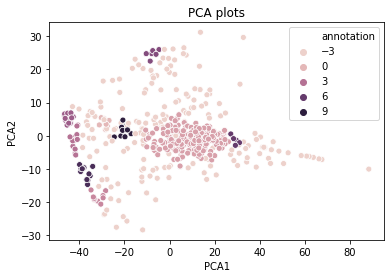

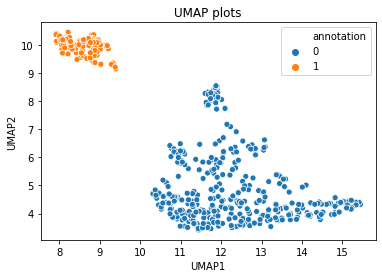

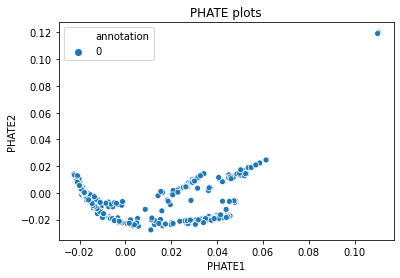

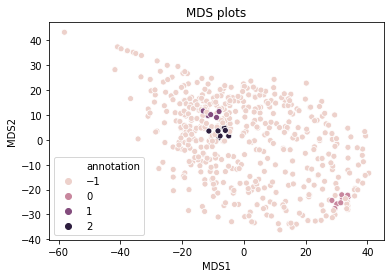

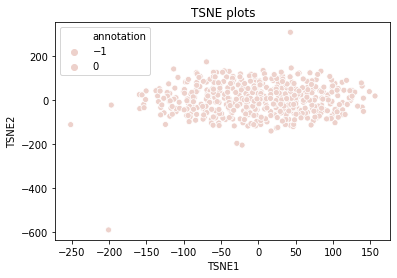

In [39]:
for method in [PCA,UMAP,PHATE,MDS,TSNE]:
    print(getattr(method,'__name__'))
    rd,rder = reduce_dimensional(test_data,method,n_components=3)
    add_clusters_annotation(rd,DBSCAN)
    scatter_plots_for_reduce_dimensional(rd,
                                     getattr(method,'__name__')+'1',
                                     getattr(method,'__name__')+'2',
                                     title=getattr(method,'__name__')+' plots',hue='annotation')

In [89]:
from sklearn.cluster import MiniBatchKMeans,AgglomerativeClustering,SpectralClustering,DBSCAN,OPTICS,AffinityPropagation,AgglomerativeClustering,Birch
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
def add_clusters_annotation(df,method,params):
    if method not in [MiniBatchKMeans,AgglomerativeClustering,
                      SpectralClustering,DBSCAN,OPTICS,AffinityPropagation,
                      AgglomerativeClustering,Birch]:
        raise ValueError('method should be in sklearn.cluster.*, e.g. DBSCAN')
    if method in [MiniBatchKMeans,AgglomerativeClustering,SpectralClustering,Birch]:
        cluster= method(n_clusters=params['n_clusters'])
    elif method in [DBSCAN,OPTICS]:
        cluster=method(eps=params['eps'])
    elif method == AffinityPropagation:
        cluster=method(damping=params['damping'], preference=params['preference'])
    clustering = cluster.fit_predict(df)
    df['clusters']=clustering


In [73]:
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 4,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

/Users/logan/opt/anaconda3/envs/single-cell-test/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


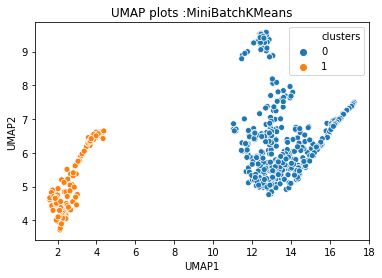

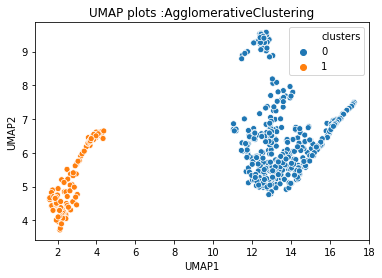

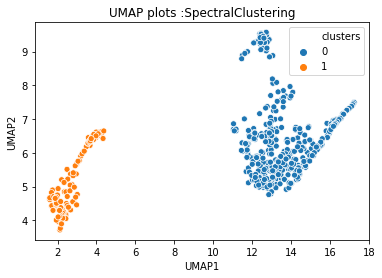

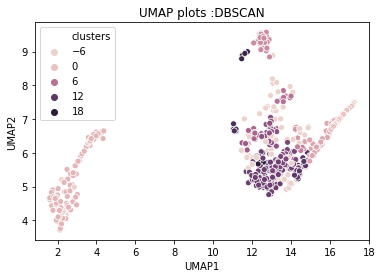

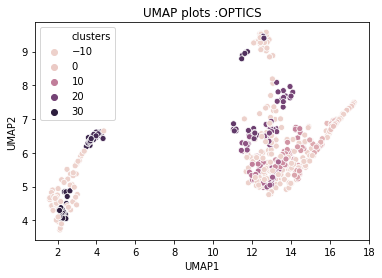

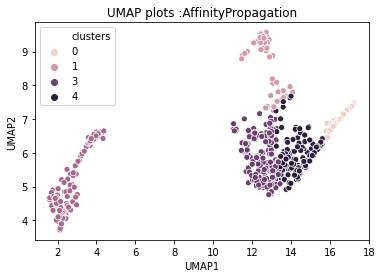

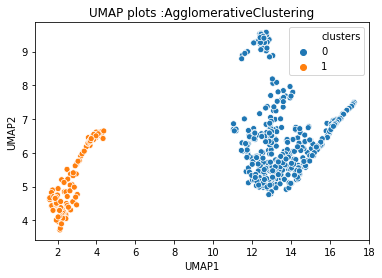

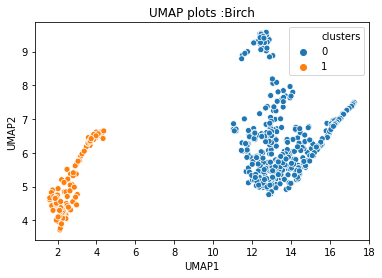

In [90]:


rd,rder = reduce_dimensional(test_data,UMAP,n_components=3)
for i in [MiniBatchKMeans,AgglomerativeClustering,
                      SpectralClustering,DBSCAN,OPTICS,AffinityPropagation,
                      AgglomerativeClustering,Birch]:
    another=rd.copy()
    add_clusters_annotation(another,i,default_base)
    scatter_plots_for_reduce_dimensional(another,
                                         getattr(UMAP,'__name__')+'1',
                                         getattr(UMAP,'__name__')+'2',
                                         title=getattr(UMAP,'__name__')+' plots :'+getattr(i,'__name__'),hue='clusters')

<AxesSubplot:xlabel='clusters'>

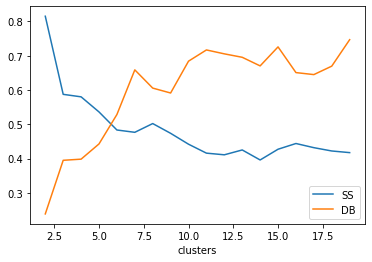

In [92]:
met=[]
for i in range(2,20):
#     print(i)
    another=rd.copy()
    default_base['n_clusters']=i
    add_clusters_annotation(another,SpectralClustering,default_base)
#     scatter_plots_for_reduce_dimensional(another,
#                                          getattr(UMAP,'__name__')+'1',
#                                          getattr(UMAP,'__name__')+'2',
#                                          title=getattr(UMAP,'__name__')+' plots :'+str(i),hue='clusters')
    met.append([i,silhouette_score(rd,another['clusters']),calinski_harabasz_score(rd,another['clusters']),davies_bouldin_score(rd,another['clusters'])])
pd.DataFrame(met,columns=['clusters','SS','CHS','DB']).plot(x='clusters',y=['SS','DB'])